# Final model:
this notebook contain the final model wich is a combination between the yolo models and the easyocr model,it recognizes the plate using yolo then crop it and read it using easyocr
there two ways tor run the model :

*   predicting one image using predict_one function
*   predicting many images using predict_many function



In [ ]:
# merging both models in one function wich takes a photo path and prints the prediction string

def predict_one(img_path):
  model = YOLO('/content/drive/MyDrive/TrainYolov8CustomDataset/best (1).pt')
  image = cv2.imread(img_path)
  if image is None:
        print(f"Error: Could not load image at path: {path}")
        return

  results = model(image)

    # Extract predictions
  pred_boxes = results[0].boxes  # Get the bounding boxes from the first image in the results

    # If no predictions were made
  if len(pred_boxes) == 0:
        print("couldn't extract license plate from image")
        return

    # Select the bounding box with the highest confidence
  best_box = max(pred_boxes, key=lambda box: box.conf.cpu().numpy()[0])

  best_box = max(pred_boxes, key=lambda box: box.conf.cpu().numpy()[0])

    # Convert coordinates from tensor to numpy array for the best box
  xyxy = best_box.xyxy.cpu().numpy()[0]
  conf = best_box.conf.cpu().numpy()[0]
  cls = int(best_box.cls.cpu().numpy()[0])
  label = f'{model.names[cls]} {conf:.2f}'
    #get the bounding box coordinates
  x_min, y_min, x_max, y_max = map(int, xyxy)
   # Crop the image using the bounding box coordinates
  cropped_image = image[y_min:y_max, x_min:x_max]

  image_filename = os.path.basename(img_path)
  cropped_path = "/content/drive/MyDrive/deep-text-recognition-benchmark/cropped_images"
  cropped_image_path=os.path.join(cropped_path,image_filename)
  cv2_imshow(cropped_image)
  cv2.imwrite(cropped_image_path, cropped_image)
  #the following line executes the demo_for_singel_pred.py file wich makes the easy ocr model prediction based on the cropped image
  !python /content/drive/MyDrive/deep-text-recognition-benchmark/demo_for_singel_pred.py --Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn --image_folder /content/drive/MyDrive/deep-text-recognition-benchmark/cropped_images --saved_model /content/drive/MyDrive/deep-text-recognition-benchmark/saved_models/best_model/best_norm_ED.pth

  if os.path.exists(cropped_image_path):
      os.remove(cropped_image_path)
  else:
      print(f'{cropped_image_path} not found, could not delete.')

  return

predict_one function takes an image path and prints the prediction

In [ ]:
!pip install lmdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.4 MB/s eta 0:00:00



0: 576x640 1 matricule, 198.7ms
Speed: 10.9ms preprocess, 198.7ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 640)


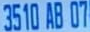

/content/drive/MyDrive/deep-text-recognition-benchmark/demo_for_singel_pred.py:52: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(opt.saved_m

In [ ]:
predict_one("/content/images/img_17.jpg")

In [ ]:
def predict_many(img_folder_path):
  paths = []
  for dirpath,dirnames,filenames in os.walk(img_folder_path):
    for filename in filenames:
      image_path=os.path.join(dirpath,filename)
      paths+=[image_path]

  model = YOLO('/content/drive/MyDrive/TrainYolov8CustomDataset/best (1).pt')



# Variables to track images with no predictions
  no_prediction_count = 0

  # Process each image
  for path in paths:
      # Load an image
      image = cv2.imread(path)

      # Check if the image was loaded successfully
      if image is None:
          print(f"Error: Could not load image at path: {path}")
          continue

      # Perform inference
      results = model(image)

      # Extract predictions
      pred_boxes = results[0].boxes  # Get the bounding boxes from the first image in the results

      # If no predictions were made
      if len(pred_boxes) == 0:
          no_prediction_count += 1
          continue

      # Select the bounding box with the highest confidence
      best_box = max(pred_boxes, key=lambda box: box.conf.cpu().numpy()[0])

      # Convert coordinates from tensor to numpy array for the best box
      xyxy = best_box.xyxy.cpu().numpy()[0]
      conf = best_box.conf.cpu().numpy()[0]
      cls = int(best_box.cls.cpu().numpy()[0])
      label = f'{model.names[cls]} {conf:.2f}'
      #get the bounding box coordinates
      x_min, y_min, x_max, y_max = map(int, xyxy)
    # Crop the image using the bounding box coordinates
      cropped_image = image[y_min:y_max, x_min:x_max]
      # Optionally, save or display the cropped image
      image_filename = os.path.basename(path)
      #cv2_imshow(cropped_image)
      cropped_image_path=os.path.join("/content/drive/MyDrive/TrainYolov8CustomDataset/cropped_predictions_yolo",image_filename)
      cv2.imwrite(cropped_image_path, cropped_image)
      #the next line of code runs demo.py responsable of easy ocr model prediction for text recognition
  !python /content/drive/MyDrive/deep-text-recognition-benchmark/demo.py --Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn --image_folder /content/drive/MyDrive/TrainYolov8CustomDataset/cropped_predictions_yolo --saved_model /content/drive/MyDrive/deep-text-recognition-benchmark/saved_models/best_model/best_norm_ED.pth
  return


The predict_many function takes as input an images folder path then it prints the predictions and saves them in log_demo_results.txt

In [ ]:
predict_many("/content/drive/MyDrive/TrainYolov8CustomDataset/data/images/test")


0: 576x640 1 matricule, 205.7ms
Speed: 4.2ms preprocess, 205.7ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)

0: 480x640 1 matricule, 432.1ms
Speed: 5.9ms preprocess, 432.1ms inference, 7.1ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 1 matricule, 425.5ms
Speed: 5.4ms preprocess, 425.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

0: 608x640 1 matricule, 223.7ms
Speed: 6.9ms preprocess, 223.7ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 640)

0: 480x640 1 matricule, 178.9ms
Speed: 4.0ms preprocess, 178.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 640x480 1 matricule, 164.3ms
Speed: 5.0ms preprocess, 164.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

0: 512x640 1 matricule, 175.9ms
Speed: 5.0ms preprocess, 175.9ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)

0: 448x640 1 matricule, 206.1ms
Speed: 5.0ms preprocess, 206.1ms inference, 1.2ms 

In [ ]:

#Converting the text data obtained from easy ocr to csv format
import csv
f=open("/content/log_demo_result.csv","w")
f.close()
input_log_file = '/content/log_demo_result.txt'
output_csv_file = '/content/log_demo_result.csv'

# Function to manually parse each line assuming fixed-width columns
def parse_line(line):
    # Assuming the columns are at fixed positions based on your example
    image_path = line[:25].strip()          # First 25 characters
    predicted_labels = line[26:49].strip()  # Next 23 characters
    confidence_score = line[50:].strip()    # The rest of the line

    return [image_path, predicted_labels, confidence_score]

# Read the log file and write to a CSV file
with open(input_log_file, 'r') as infile, open(output_csv_file, 'w', newline='') as outfile:
    writer = csv.writer(outfile)

    # Write the header
    writer.writerow(['image_path', 'predicted_labels', 'confidence_score'])

    # Process each line in the log file
    for line in infile:
        parsed_row = parse_line(line)
        writer.writerow(parsed_row)

print("Log file has been converted to CSV.")

Log file has been converted to CSV.


the above code converts the predictions in log_demo_result.txt to csv format